# Election Prediction Machine Learning

## Data Preprocessing

In [48]:
# Import findspark and initialize. 
import findspark
findspark.init()
# Import packages
from pyspark.sql import SparkSession
import time
import warnings
warnings.filterwarnings('ignore')
# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [49]:
# 1. Read in the AWS S3 bucket into a DataFrame.
from pyspark import SparkFiles
# Read a CSV file into a DataFrame
df = spark.read.csv("CSV_Outputs/elec_eco_race_df_cleaned.csv", header=True, inferSchema=True)

# Show the DataFrame
df.show()

+--------+-----+-------------------------+---------------------------------+-----+------------------------------------------+---------------------------+------+-------+---------------+-----------+----------+------+--------------------+-------+
| State_x|white|black_or_african_american|american_indian_and_alaska_native|asian|native_hawaiian_and_other_pacific-islander|hispanic_or_latino_any_race|year_y|State_y|      candidate|total_votes|     party|year_x|  Economic Indicator|  Value|
+--------+-----+-------------------------+---------------------------------+-----+------------------------------------------+---------------------------+------+-------+---------------+-----------+----------+------+--------------------+-------+
| Alabama| 69.5|                     27.0|                              0.5|  1.0|                                       0.0|                        2.8|  2008|Alabama|   McCain, John|    1266546|Republican|  2008|Gross domestic pr...| 174665|
| Alabama| 69.5|        

## Step 1. Data Processing Split the data into training and testing datasets by using train_test_split

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
# Load dataset
elec_eco_race_df_cleaned = pd.read_csv('CSV_Outputs/elec_eco_race_df_cleaned.csv')
elec_cleaned_limited = elec_eco_race_df_cleaned.head(50000)
elec_cleaned_limited.head()

,State_x,white,black_or_african_american,american_indian_and_alaska_native,asian,native_hawaiian_and_other_pacific-islander,hispanic_or_latino_any_race,year_y,State_y,candidate,total_votes,party,year_x,Economic Indicator,Value
0,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"McCain, John",1266546,Republican,2008,Gross domestic product (GDP),174665
1,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"McCain, John",1266546,Republican,2008,Personal income,157780
2,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"McCain, John",1266546,Republican,2008,Total employment (number of jobs),2582600
3,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"Obama, Barack",813479,Democrat,2008,Gross domestic product (GDP),174665
4,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"Obama, Barack",813479,Democrat,2008,Personal income,157780


In [51]:
elec_cleaned_limited.dropna

<bound method DataFrame.dropna of         State_x  white  black_or_african_american  \
0       Alabama   69.5                       27.0   
1       Alabama   69.5                       27.0   
2       Alabama   69.5                       27.0   
3       Alabama   69.5                       27.0   
4       Alabama   69.5                       27.0   
...         ...    ...                        ...   
49995   Alabama   69.5                       27.0   
49996   Alabama   69.5                       27.0   
49997   Alabama   69.5                       27.0   
49998   Alabama   69.5                       27.0   
49999   Alabama   69.5                       27.0   

       american_indian_and_alaska_native  asian  \
0                                    0.5    1.0   
1                                    0.5    1.0   
2                                    0.5    1.0   
3                                    0.5    1.0   
4                                    0.5    1.0   
...                    

In [52]:
elec_cleaned_limited.fillna(0)

,State_x,white,black_or_african_american,american_indian_and_alaska_native,asian,native_hawaiian_and_other_pacific-islander,hispanic_or_latino_any_race,year_y,State_y,candidate,total_votes,party,year_x,Economic Indicator,Value
0,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"McCain, John",1266546,Republican,2008,Gross domestic product (GDP),174665
1,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"McCain, John",1266546,Republican,2008,Personal income,157780
2,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"McCain, John",1266546,Republican,2008,Total employment (number of jobs),2582600
3,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"Obama, Barack",813479,Democrat,2008,Gross domestic product (GDP),174665
4,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"Obama, Barack",813479,Democrat,2008,Personal income,157780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Michigan,Bernie Sanders,4024,Democrat,2016,Gross domestic product (GDP),391633
49996,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Michigan,Bernie Sanders,4024,Democrat,2016,Personal income,356356
49997,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Michigan,Bernie Sanders,4024,Democrat,2016,Total employment (number of jobs),5337592
49998,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Michigan,Hillary Clinton,2032,Democrat,2016,Gross domestic product (GDP),391633


In [53]:
party_df = pd.get_dummies(elec_cleaned_limited['party']).astype(int)
party_df.dropna


<bound method DataFrame.dropna of        Democrat  Republican
0             0           1
1             0           1
2             0           1
3             1           0
4             1           0
...         ...         ...
49995         1           0
49996         1           0
49997         1           0
49998         1           0
49999         1           0

[50000 rows x 2 columns]>

In [54]:
 # Concatenate the `party` encoded dummies with the scaled data DataFrame
elec_scaled = pd.concat([elec_eco_race_df_cleaned, party_df], axis=1)
elec_scaled


,State_x,white,black_or_african_american,american_indian_and_alaska_native,asian,native_hawaiian_and_other_pacific-islander,hispanic_or_latino_any_race,year_y,State_y,candidate,total_votes,party,year_x,Economic Indicator,Value,Democrat,Republican
0,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"McCain, John",1266546,Republican,2008,Gross domestic product (GDP),174665,0.0,1.0
1,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"McCain, John",1266546,Republican,2008,Personal income,157780,0.0,1.0
2,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"McCain, John",1266546,Republican,2008,Total employment (number of jobs),2582600,0.0,1.0
3,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"Obama, Barack",813479,Democrat,2008,Gross domestic product (GDP),174665,1.0,0.0
4,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008,Alabama,"Obama, Barack",813479,Democrat,2008,Personal income,157780,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953233,Florida,76.9,16.0,0.3,2.3,0.0,21.3,2008,Maine,Bernie Sanders,4,Democrat,2016,Personal income,49175,NaN,NaN
953234,Florida,76.9,16.0,0.3,2.3,0.0,21.3,2008,Maine,Bernie Sanders,4,Democrat,2016,Total employment (number of jobs),823556,NaN,NaN
953235,Florida,76.9,16.0,0.3,2.3,0.0,21.3,2008,Maine,Hillary Clinton,2,Democrat,2016,Gross domestic product (GDP),51001,NaN,NaN
953236,Florida,76.9,16.0,0.3,2.3,0.0,21.3,2008,Maine,Hillary Clinton,2,Democrat,2016,Personal income,49175,NaN,NaN


In [115]:
# Removed all the Null 
elec_scaled.fillna(elec_scaled.median(numeric_only=True), inplace=True)

In [116]:
# Separate the data into labels (target variable 'party') and features
y = elec_scaled['Republican']



In [143]:
# Separate the X variable (features) by dropping unwanted columns
X = elec_scaled.drop(columns=['party','State_x', 'white', 'black_or_african_american',
       'american_indian_and_alaska_native', 'asian',
       'native_hawaiian_and_other_pacific-islander',
       'hispanic_or_latino_any_race', 'year_y', 'State_y', 'candidate',
        'party', 'year_x', 'Economic Indicator','Republican'])

In [122]:
X

,total_votes,Value,Democrat
0,1266546,174665,0.0
1,1266546,157780,0.0
2,1266546,2582600,0.0
3,813479,174665,1.0
4,813479,157780,1.0
...,...,...,...
953233,4,49175,0.0
953234,4,823556,0.0
953235,2,51001,0.0
953236,2,49175,0.0


In [123]:
y

0         1.0
1         1.0
2         1.0
3         0.0
4         0.0
         ... 
953233    1.0
953234    1.0
953235    1.0
953236    1.0
953237    1.0
Name: Republican, Length: 953238, dtype: float64

In [124]:
counts = elec_eco_race_df_cleaned['party'].value_counts()
counts

party
Republican    570924
Democrat      382314
Name: count, dtype: int64

## Step 2 Create a Logistic Regression Model with the Original Data 

In [125]:
# Import the LogisticRegression module from SKLearn
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [127]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [128]:
logistic_classifier = LogisticRegression(solver='lbfgs', random_state=1)

In [129]:
# Fit the model using training data

logistic_classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

#### Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model

In [131]:
# Make a prediction using the testing data
logistic_predictions = logistic_classifier.predict(X_test)

#### Evaluate the model’s performance by doing the following:

In [132]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)

[[     0   5381]
 [     0 232929]]


In [133]:
# Print the classification report for the model
classification_report=classification_report(y_test, logistic_predictions)
print("Classification_report:")
print(classification_report)   

Classification_report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5381
         1.0       0.98      1.00      0.99    232929

    accuracy                           0.98    238310
   macro avg       0.49      0.50      0.49    238310
weighted avg       0.96      0.98      0.97    238310



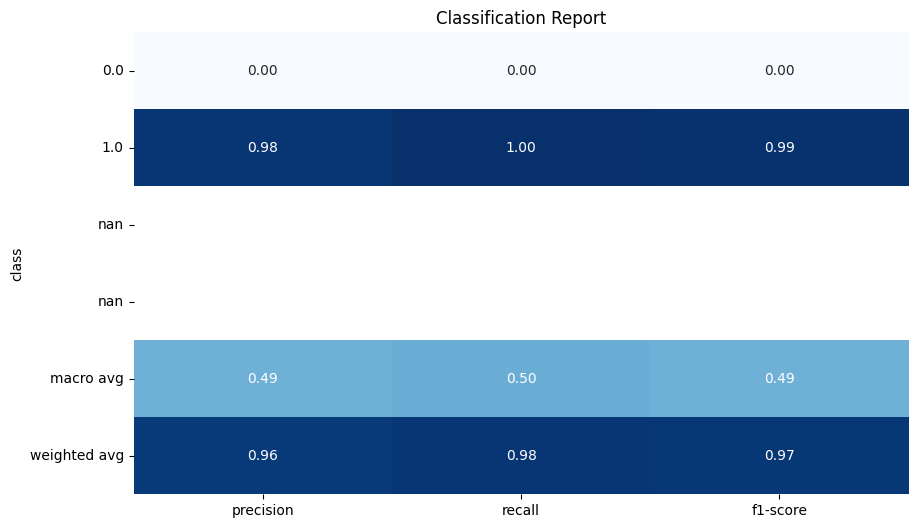

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate the classification report string
# Replace 'y_test' and 'logistic_predictions' with your actual data
report_str = classification_report(y_test, logistic_predictions)

# Convert the classification report string into a DataFrame
classification_data = []  # Ensure this is empty to start
lines = report_str.strip().split('\n')  # Now using the correct string variable

for line in lines[2:]:
    row = {}
    row_data = line.split()
    if len(row_data) == 5:  # for precision, recall, f1-score, support
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1-score'] = float(row_data[3])
        row['support'] = int(row_data[4])
    elif len(row_data) == 6:  # for accuracy, macro avg, weighted avg
        row['class'] = ' '.join(row_data[0:2])
        row['precision'] = float(row_data[2])
        row['recall'] = float(row_data[3])
        row['f1-score'] = float(row_data[4])
        row['support'] = int(row_data[5])
    classification_data.append(row)

# Create a DataFrame from the parsed classification report data
df = pd.DataFrame.from_dict(classification_data)
df.set_index('class', inplace=True)

# Plotting the heatmap with seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title("Classification Report")
# Save the plot as a .png file
plt.savefig("Visualizations/classification_report_heatmap.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

##### Display the 2024 Presidential Prediction Matrix using Original Data

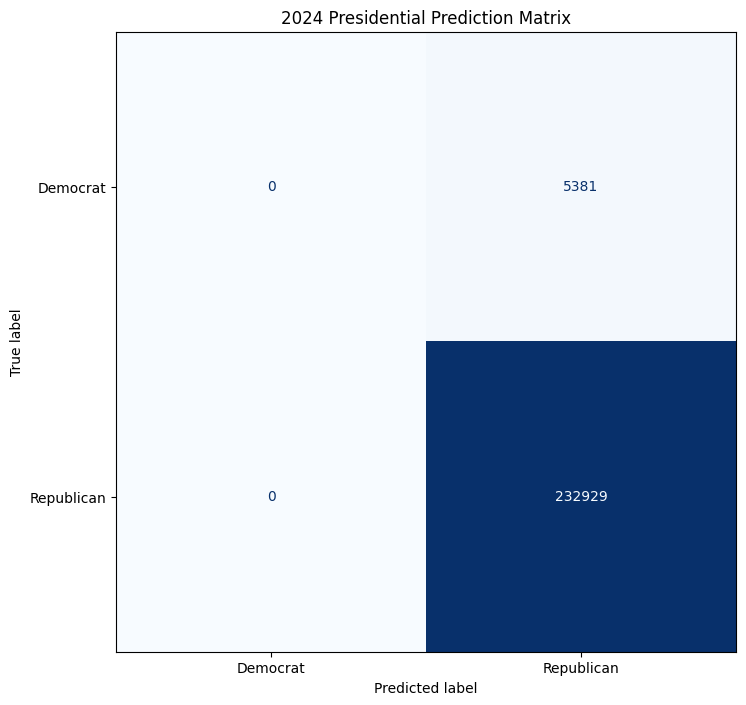

In [189]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and logistic_predictions are defined
fig, ax = plt.subplots(figsize=(8, 10))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    logistic_predictions,  
    ax=ax,
    display_labels=["Democrat", "Republican"], 
    colorbar=False,
    cmap='Blues'  # Added colormap for clarity
)
plt.title("2024 Presidential Prediction Matrix")
# Save the plot to a .png file
plt.savefig("Visualizations/confusion_matrix.png", format='png', dpi=300, bbox_inches='tight')
plt.show()



## Model Using Tensorflow

In [35]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### Compile, Train and Evaluate the Model

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
first_hidden_layer = 90
second_hidden_layer = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=first_hidden_layer, input_dim = input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=second_hidden_layer, activation = 'sigmoid'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                360       
                                                                 
 dense_1 (Dense)             (None, 30)                2730      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [111]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
22342/22342 [==============================] - 15s 661us/step - loss: 0.0013 - accuracy: 0.9999
Epoch 2/10
22342/22342 [==============================] - 15s 668us/step - loss: 2.6079e-08 - accuracy: 1.0000
Epoch 3/10
22342/22342 [==============================] - 15s 653us/step - loss: 1.6291e-08 - accuracy: 1.0000
Epoch 4/10
22342/22342 [==============================] - 15s 658us/step - loss: 1.5566e-08 - accuracy: 1.0000
Epoch 5/10
22342/22342 [==============================] - 15s 681us/step - loss: 1.5165e-08 - accuracy: 1.0000
Epoch 6/10
22342/22342 [==============================] - 15s 652us/step - loss: 1.4957e-08 - accuracy: 1.0000
Epoch 7/10
22342/22342 [==============================] - 15s 679us/step - loss: 1.4868e-08 - accuracy: 1.0000
Epoch 8/10
22342/22342 [==============================] - 15s 656us/step - loss: 1.4846e-08 - accuracy: 1.0000
Epoch 9/10
22342/22342 [==============================] - 16s 715us/step - loss: 1.4826e-08 - accuracy: 1.0000
Epoch

In [113]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

7448/7448 - 3s - loss: 1.4783e-08 - accuracy: 1.0000 - 3s/epoch - 383us/step
Loss: 1.478347844141581e-08, Accuracy: 1.0


In [190]:
# Export our model to HDF5 file
nn.save("ML_output/Presidential_ML")

INFO:tensorflow:Assets written to: ML_output/Presidential_ML/assets


INFO:tensorflow:Assets written to: ML_output/Presidential_ML/assets
